In [1]:
using Revise
using LilGuys
using CairoMakie, Arya

In [2]:
using Printf

In [3]:
import DataFrames: DataFrame, rename!

In [4]:
using OrderedCollections

In [5]:
using PyFITS

In [6]:
import TOML

In [7]:
CairoMakie.activate!(type=:png)

In [8]:
models_dir = "."

"."

In [9]:
sims_dir = "/astro/dboyea/dwarfs/simulations/ursa_minor"

"/astro/dboyea/dwarfs/simulations/ursa_minor"

In [10]:
function get_idx_f(name)
    return TOML.parsefile(joinpath(models_dir, "$name/orbital_properties.toml"))["idx_f"]
end

get_idx_f (generic function with 1 method)

In [11]:
function load_scalars(name) 
    path = joinpath(models_dir, "$name/profiles_scalars.fits")

    return read_fits(path)[1:get_idx_f(name), :]
end

load_scalars (generic function with 1 method)

In [12]:
function load_profiles(name) 
    path = joinpath(models_dir, "$name/profiles.hdf5")

    profs = LilGuys.read_ordered_structs(path, LilGuys.MassProfile)

    prof_i = profs[begin].second
    prof_f = profs[get_idx_f(name)].second
    return prof_i, prof_f
end

load_profiles (generic function with 1 method)

# Plotting functions

In [13]:
log_r_label = "log r / kpc"
log_rho_label = L"\log \rho"

L"$\log \rho$"

In [14]:
function compare_vcirc(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel=log_r_label,
        ylabel=L"$\log\,v_\textrm{circ}$ / km\,s$^{-1}$",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.r_circ_max
        y = prof.v_circ_max
        lines!(log10.(x), log10.(y*V2KMS), label=label)
    end
    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.r_circ_max
        y = prof.v_circ_max
        scatter!(log10.(x[end]), log10.(y[end]*V2KMS))
    end
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_vcirc (generic function with 1 method)

In [15]:
function compare_vcirc_time(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel="time / Gyr",
        ylabel=L"$\log\,v_\textrm{circ}$ / km\,s$^{-1}$",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, profs = profiles[i]
        x = prof.time * T2GYR
        y = prof.v_circ_max
        lines!((x), log10.(y*V2KMS), label=label)
    end
    
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_vcirc_time (generic function with 1 method)

In [16]:
function compare_boundmass_time(profiles; errskip=1, legend=true)
    xlims = (-2, 3)
    
    fig = Figure()
    ax = Axis(fig[1, 1],
        xlabel="time / Gyr",
        ylabel="log bound mass",
#        limits=(xlims[1], xlims[2], -0.1, 1.7),
        )
    pi = 1

    
    for i in eachindex(profiles)
        label, prof = profiles[i]
        x = prof.time * T2GYR
        y = prof.bound_mass
        lines!((x), log10.(y), label=label)
    end
    
    if legend
        axislegend(position=:lt)
    end
    fig
end

compare_boundmass_time (generic function with 1 method)

# Particle Number

In [17]:
profiles = [
    "1e6" => load_scalars("1e6_v38_r4.0/orbit_smallperi.3"),
    "1e6_new" => load_scalars("1e6_new_v38_r4.0/orbit_smallperi.3"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened


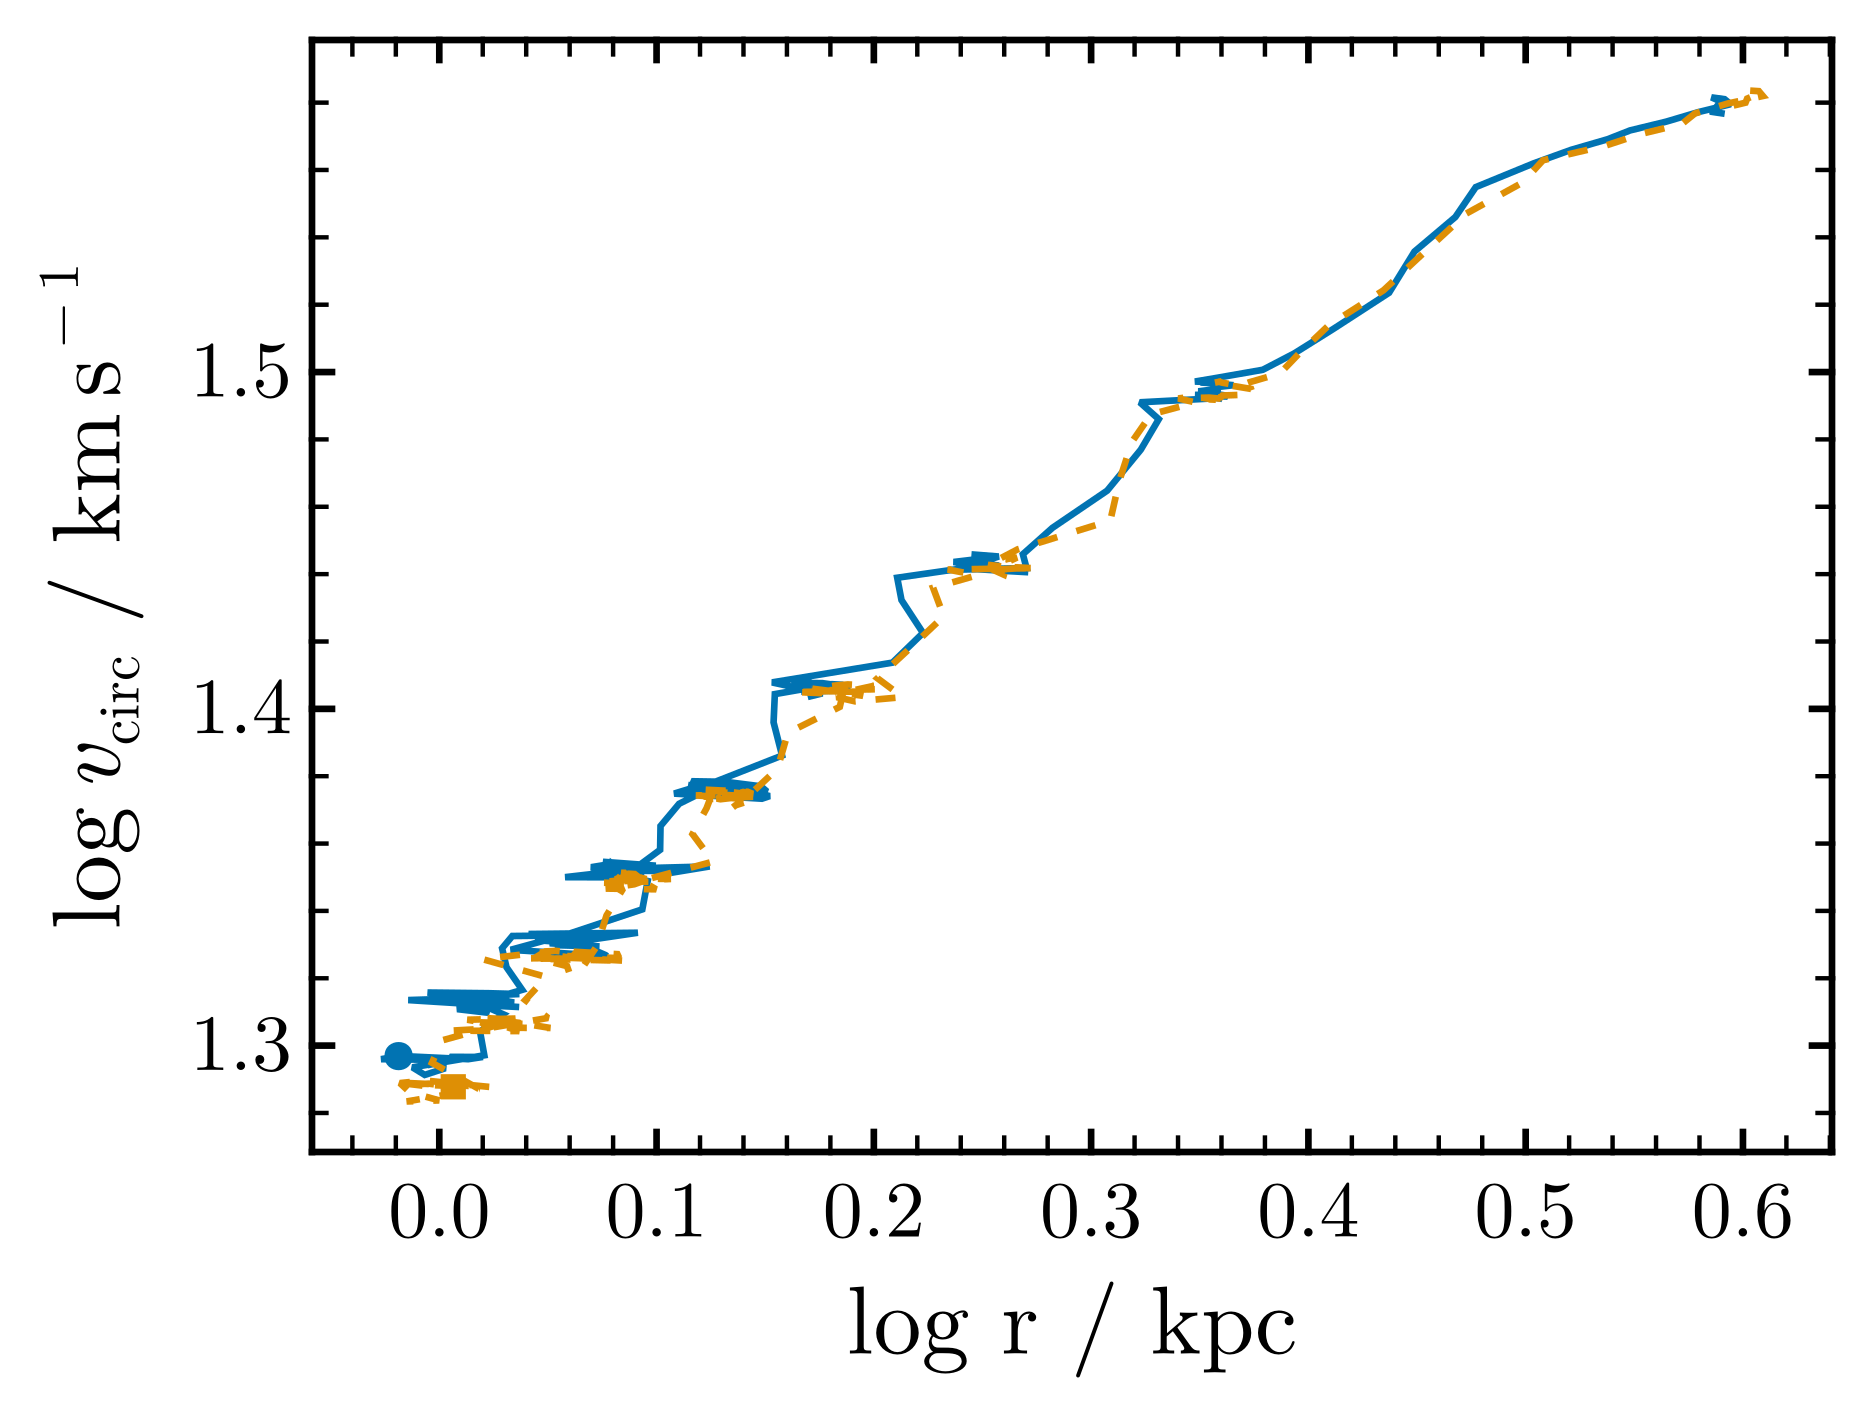

In [18]:
fig = compare_vcirc(profiles, legend=false)

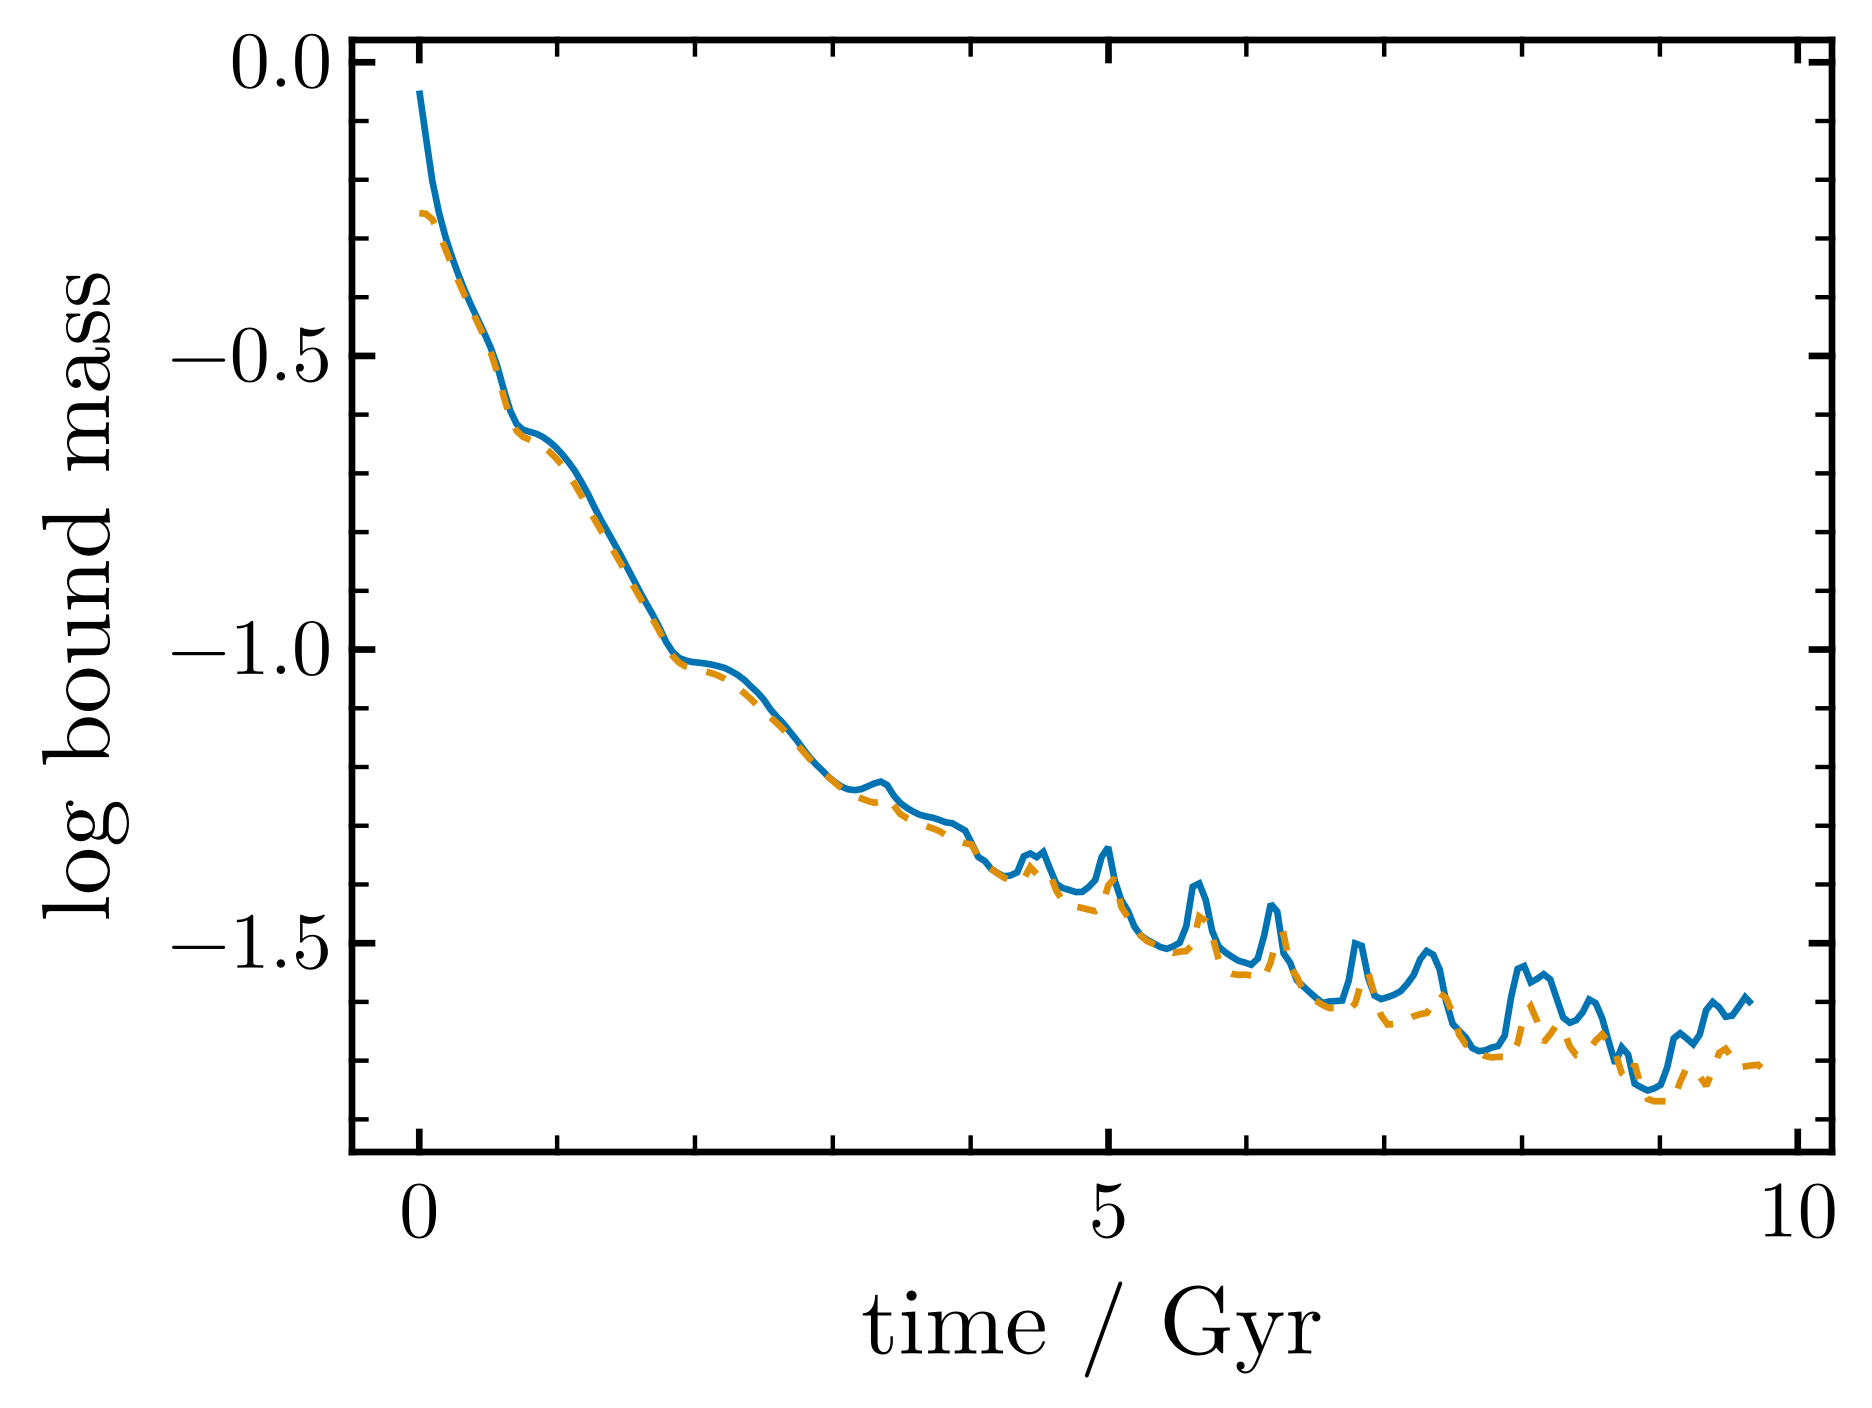

In [22]:
fig = compare_boundmass_time(profiles, legend=false)

In [52]:
profiles[4].second.bound_mass / 0.564 # M200

206-element Vector{Float64}:
 1.5870551090309724
 1.3252687817412045
 1.115615627727995
 0.9864118842466747
 0.8956815307184831
 0.828557034882018
 0.7717261784827281
 0.7245287465952558
 0.6830542354309493
 0.6470947407705255
 0.6133110986645836
 0.5787958241533776
 0.5383814658019042
 ⋮
 0.03939229486125778
 0.03860352847206939
 0.03773223521721139
 0.039151062484685084
 0.043134570808352805
 0.044523244028754905
 0.0436106873410621
 0.04202521928714016
 0.04220614356956968
 0.04370432359249492
 0.04536755734675938
 0.04414076374747845

## Iterative convergence

In [43]:
profiles = [
    "1e5 1" => load_scalars("1e5_new_v38_r4.0/orbit_smallperi.1"),
    "1e5 2" => load_scalars("1e5_v38_r4.0/orbit_smallperi.2"),
    "1e5 3" => load_scalars("1e5_v38_r4.0/orbit_smallperi.3"),
    "1e6 3" => load_scalars("1e6_v38_r4.0/orbit_smallperi.3"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


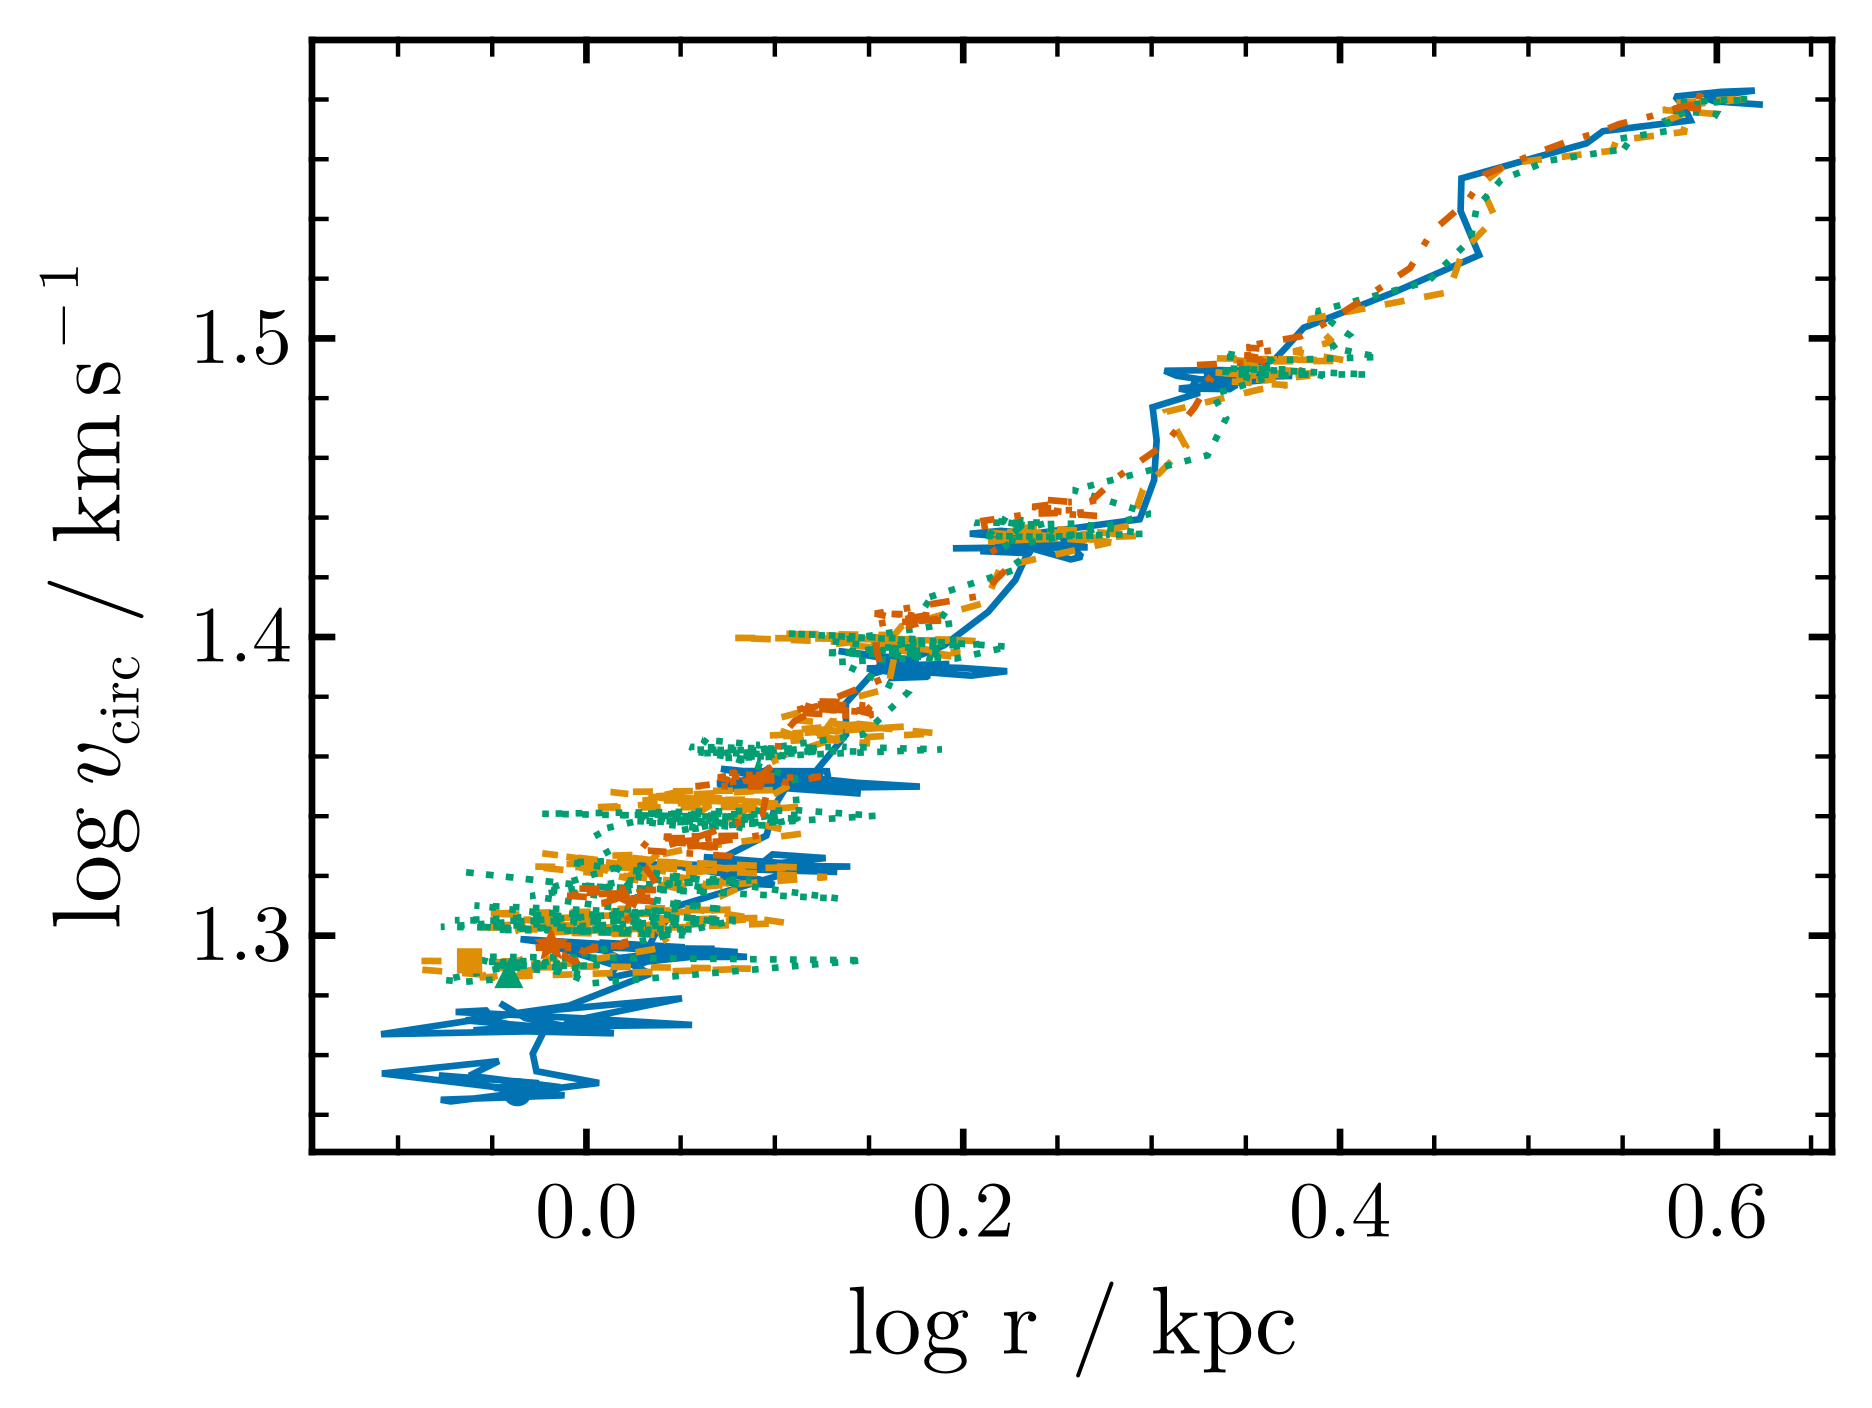

In [44]:
fig = compare_vcirc(profiles, legend=false)

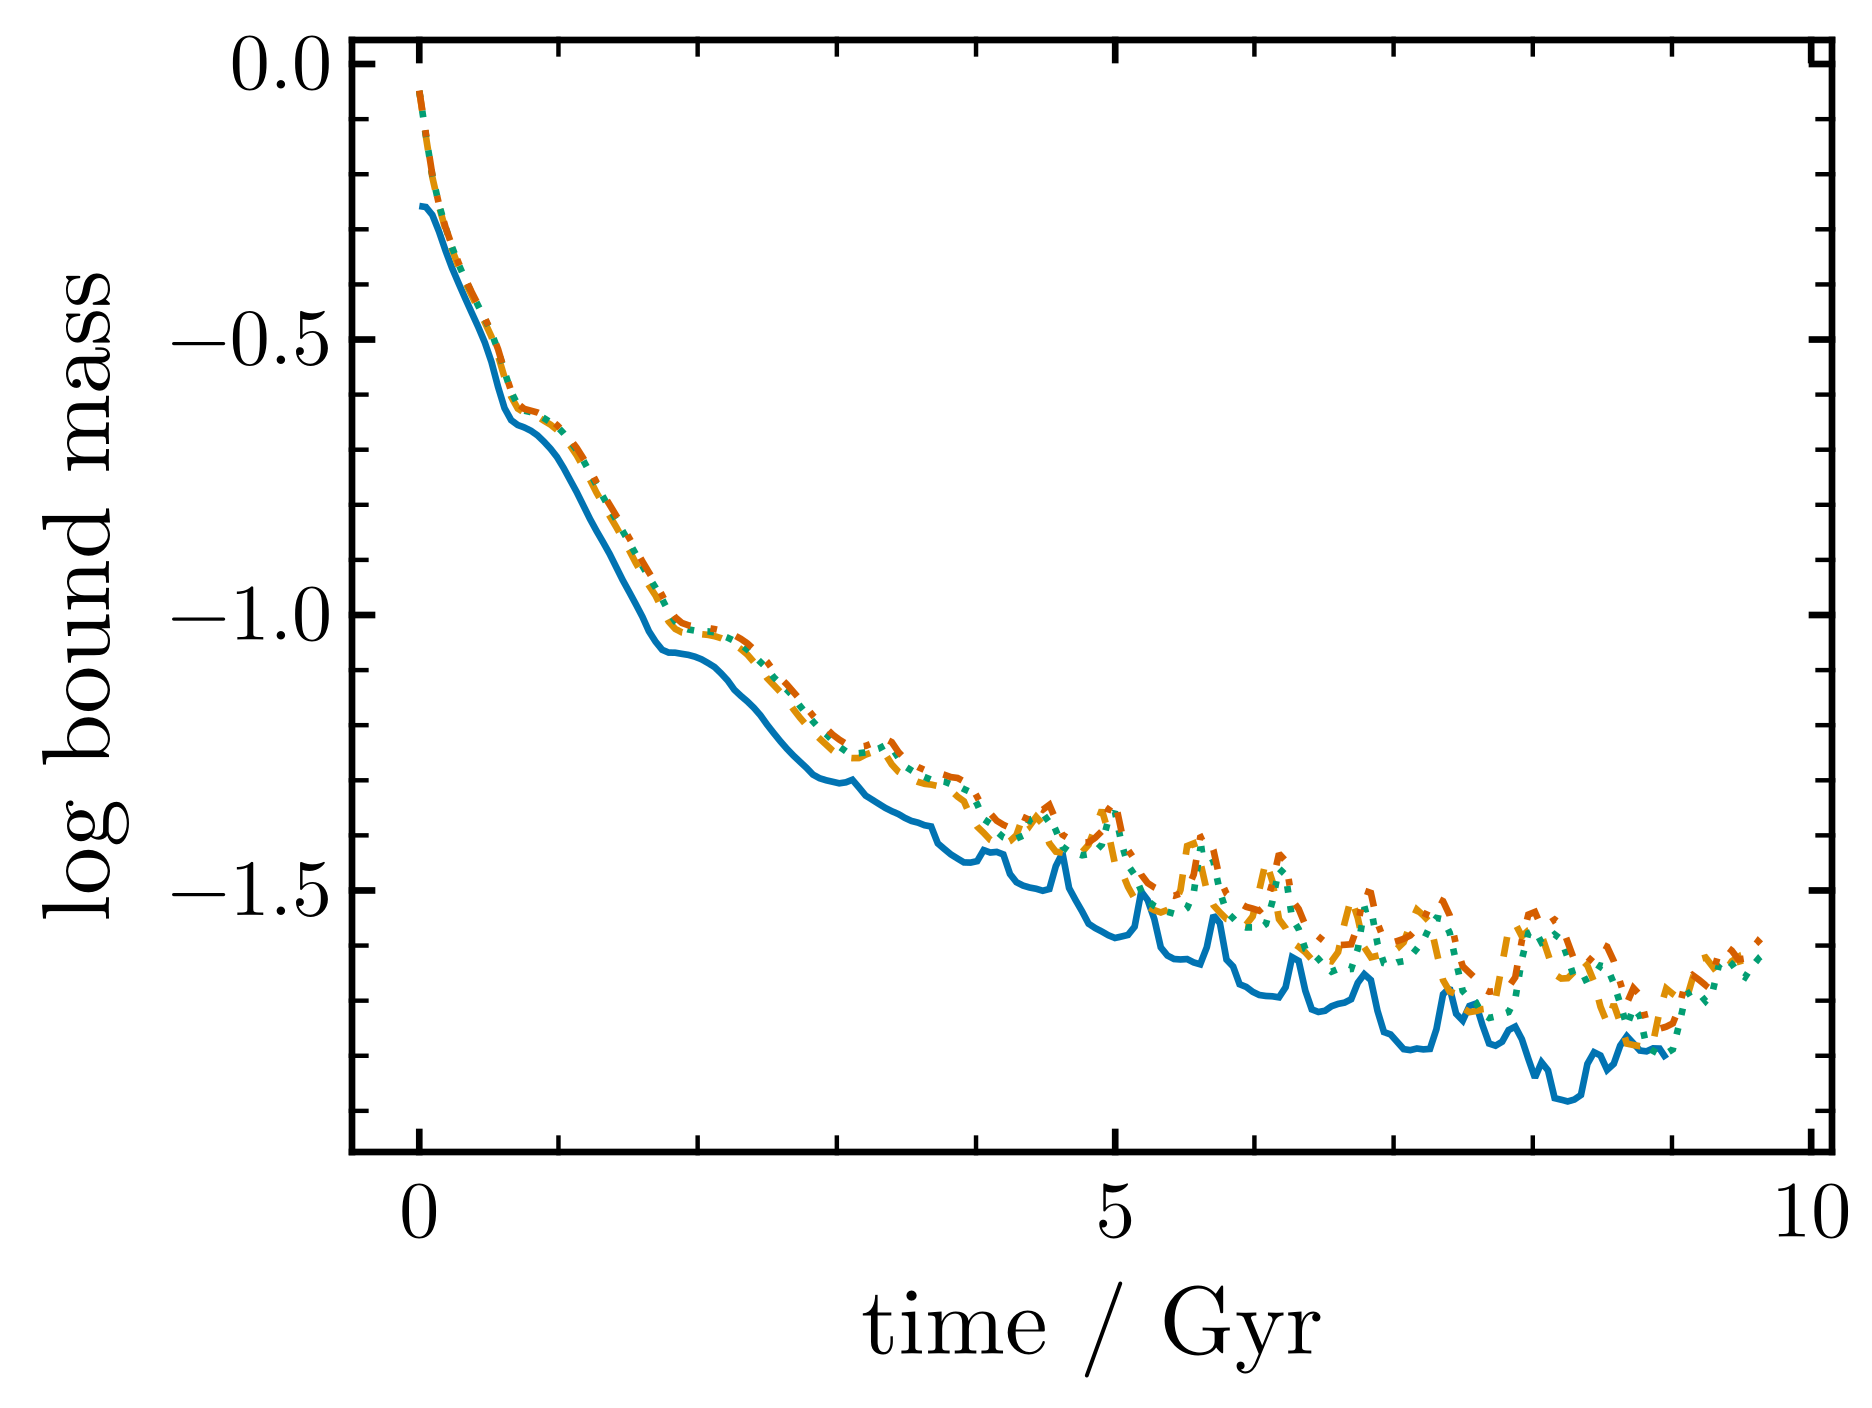

In [45]:
fig = compare_boundmass_time(profiles, legend=false)

In [17]:
profiles = [
    "1e5 1" => load_scalars("1e5_new_v38_r4.0/orbit_smallperi.1"),
    "1e5 2" => load_scalars("1e5_new_v38_r4.0/orbit_smallperi.2"),
    "1e5 3" => load_scalars("1e5_new_v38_r4.0/orbit_smallperi.3"),
    "1e6 3" => load_scalars("1e6_new_v38_r4.0/orbit_smallperi.3"),
    "1e6 4" => load_scalars("1e6_new_v38_r4.0/orbit_smallperi.4"),
    ];

[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened
[ Info: astropy table opened


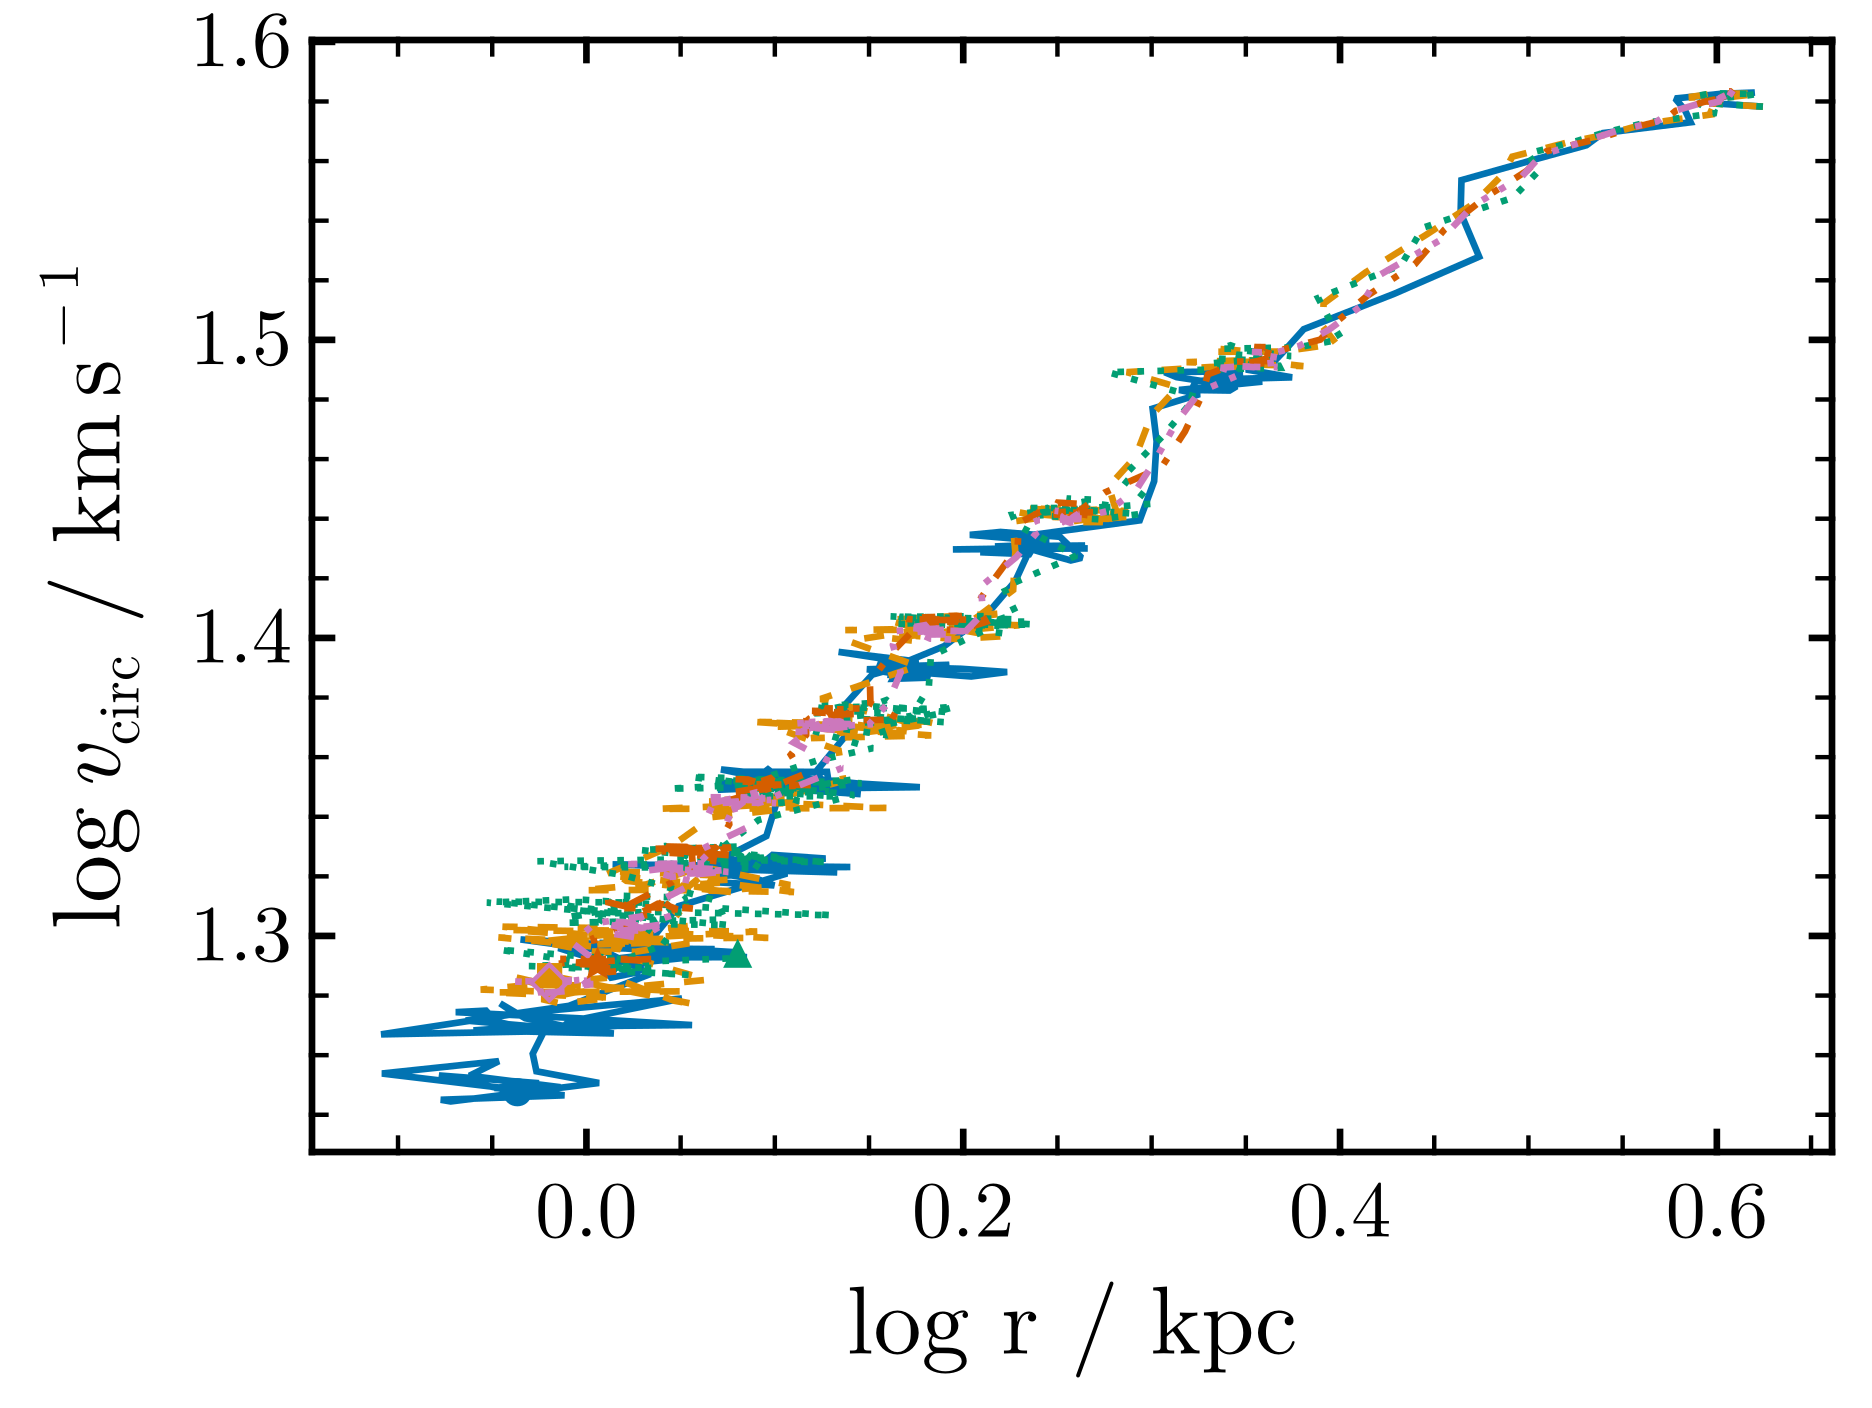

In [18]:
fig = compare_vcirc(profiles, legend=false)

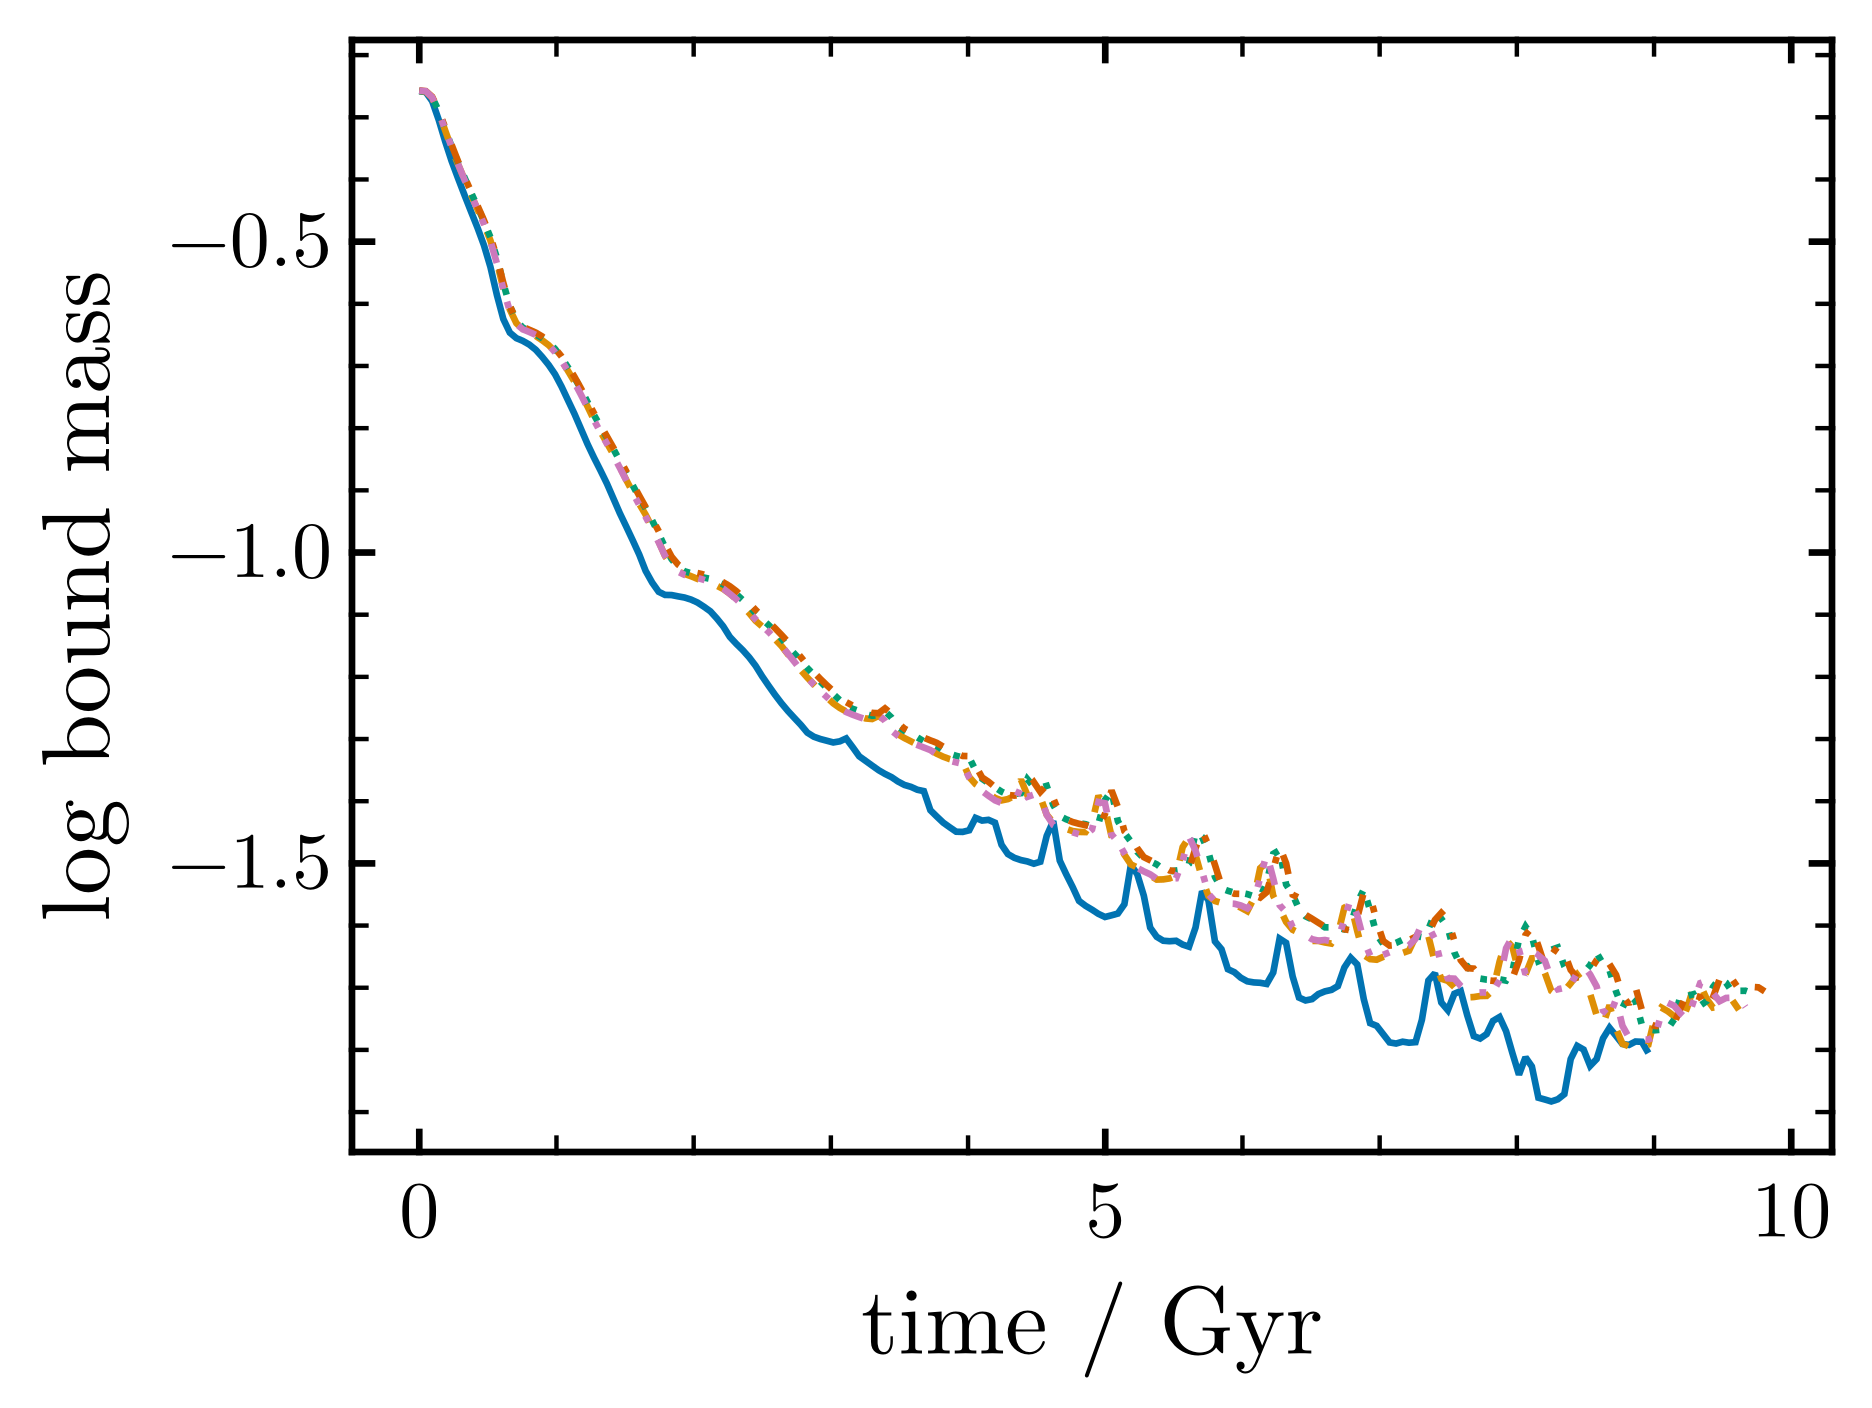

In [19]:
fig = compare_boundmass_time(profiles, legend=false)